In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import time
np.random.seed(4)

N=15/np.pi**4
x=np.linspace(0.1,20,100)

def f(x):
    return N*x**3/(np.exp(x)-1)

def df(x): #find maximum of f(x)
    if x==0:
        return 1 #must have different signs
    else:
        return N*(3*x**2*np.exp(x)-3*x**2-x**3*np.exp(x))/(np.exp(x)-1)**2
d=opt.brentq(df,0,5)

def h(x): #find x_s
    return f(d)*x**0.1*np.exp(x*0.9)-200*N
x_s=opt.brentq(h,0,10)

datax=[]
datay=[]

datax_junk=[]
datay_junk=[]
start=time.time() #measure time of loop

i=0 #rejected numbers
while len(datax)<1e5: 
    ranx=np.random.uniform(high=20)
    rany=np.random.uniform(high=f(d))
    if f(ranx)>rany:
        datax.append(ranx)
        datay.append(rany)
    else:
        i=i+1
        datax_junk.append(ranx)
        datay_junk.append(rany)
end=time.time()

In [3]:
def g(x):
    return 200*N*x**(-0.1)*np.exp(-x*0.9)

datax2=[]
datay2=[]
datax2_junk=[]
datay2_junk=[]

start2=time.time() #measure time of loop
np.random.seed(2)
j=0 #rejected numbers
while len(datax2)<1e5: #
    ranx=np.random.uniform(high=20)
    if ranx>x_s:
        rany=np.random.uniform(high=g(ranx))
    else:
        rany=np.random.uniform(high=f(d))
    if f(ranx)>rany:
        datax2.append(ranx)
        datay2.append(rany)
    else:
        j=j+1
        datax2_junk.append(ranx)
        datay2_junk.append(rany)
end2=time.time()

rejected numbers: 338332
time to finish: 5.67231822013855 sec.


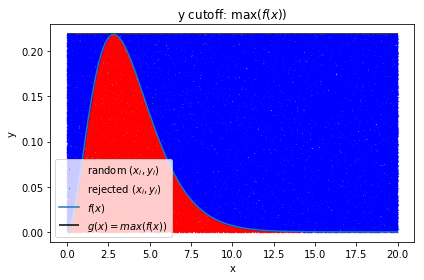

In [37]:
plt.title("y cutoff: max$(f(x))$")

plt.plot(datax,datay,"r.",ms=0.4,label="random $(x_i,y_i)$")
plt.plot(datax_junk,datay_junk,"b.",ms=0.4,label="rejected $(x_i,y_i)$")
plt.plot(x,f(x),label="$f(x)$")
plt.hlines(f(d),0,20,label="$g(x)=max(f(x))$")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
print("rejected numbers:",i)
print("time to finish:",end-start,"sec.")

rejected numbers: 11700
time to finish: 1.427079677581787 sec.


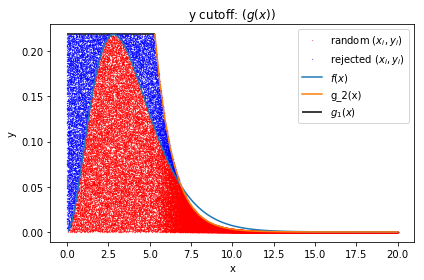

In [5]:
plt.title("y cutoff: $(g(x))$")

plt.plot(datax2,datay2,"r.",ms=0.4,label="random $(x_i,y_i)$")
plt.plot(datax2_junk,datay2_junk,"b.",ms=0.4,label="rejected $(x_i,y_i)$")
plt.plot(x,f(x),label="$f(x)$")
plt.hlines(f(d),0,x_s,label="$g_1(x)$")
plt.plot(np.linspace(x_s,20),g(np.linspace(x_s,20)),label="g_2(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
print("rejected numbers:",j)
print("time to finish:",end2-start2,"sec.")

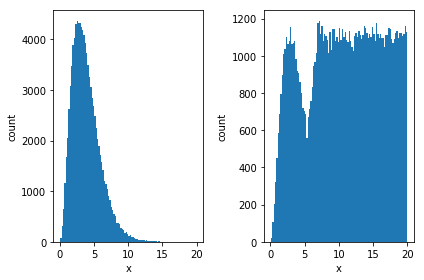

In [38]:
plt.subplot(1,2,1)
plt.xlabel("x")
plt.ylabel("count")
plt.hist(datax,bins=100)

plt.subplot(1,2,2)
plt.xlabel("x")
plt.ylabel("count")
plt.hist(datax2,bins=100)

plt.tight_layout()
plt.show()

Der Algorithmus in a) braucht ca. 5,7s um das gesuchte array zu füllen und verwirft dabei 338332 Zahlen.
Im Vergleich dazu benötigt der Algorithmus in b) nur 1,4s und verwirft nur 11700 Zahlen.
Der Vergleich der zwei vorherigen Histogramme zeigt, dass der zweite Algorithmus weniger Zahlen im Intervall $[0,x_s)$ aber mehr im Intervall $[x_s,20)$ erzeugt, wobei $x_s\approx 5.31$.

## 9a)
Die Vorschlagsverteilungsdichte der Normalverteilung ist durch

\begin{equation}
q(x_i,x_j)= 
  \begin{cases}
     \frac{1}{2h}, & \text{if}\ h-x_i<x_j<h+x_i  \\
      0, & \text{sonst.}
    \end{cases}
\end{equation}
mit Schrittweite $h$ beschrieben.
Das beudeutet, wenn wir am Punkt $x_i$ angelangt sind, ist die Wahrscheinlichkeit bei Punkt $x_j$ anzukommen gerade:
\begin{equation}
q(x_j,x_i)= 
  \begin{cases}
     \frac{1}{2h}, & \text{if}\ h-x_j<x_i<h+x_j  \\
      0, & \text{sonst.}
    \end{cases}
\end{equation}
Es handelt sich also um einen reversiblen Prozess mit $q(x_i,x_j)=q(x_j,x_i)$, womit das Verhältnis $\frac{q(x_i,x_j)}{q(x_j,x_i)}=1$ ist. Dadurch ist die Übergangswahrscheinlichkeit des Metropolis-Hastings-Algorithmus gleich dem Metropolis-Algorithmus: $M_{i\rightarrow j}=\text{min}\left(\frac{f(x_j)}{f(x_i)}\right)$.

In [10]:
x=[f(3)]
s=0.5 #Schrittweite
t=0
def p(x0,x1): #x0 momentaner wert, x1 vorgeschlagener
    return min([1,np.exp((x0**2-x1**2)/2)])
while t<10:
    x_prob=(x[t]-s)+np.random.uniform(high=2*s)
    a=np.random.uniform()
    if a<=p(x[t],x_prob):
        x.append(x_prob)
    else:
        x.append(x[t])
    t=t+1
print(x)

[0.2178467826124293, -0.04051769828117213, 0.041932857595626594, 0.20226929599317645, 0.6664465630467782, 1.0476113362440587, 0.7754932900274819, 0.6251959529941263, 0.1948658908710441, -0.12649316021917822, -0.12649316021917822]
